# **1. Perkenalan Dataset**


Dataset Titanic yang diunggah berisi informasi tentang penumpang Titanic, seperti usia, jenis kelamin, kelas tiket, dan beberapa fitur lain yang mungkin berguna dalam analisis. Kita akan mengeksplorasi data ini lebih lanjut dan melakukan beberapa transformasi sesuai kebutuhan.Dataset ini didapat dengan sumber kaggle

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [29]:
df = pd.read_csv('/content/drive/My Drive/titanic.csv')

df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset shape: (1309, 28)

Missing values in each column:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

Data types of each column:
Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12    

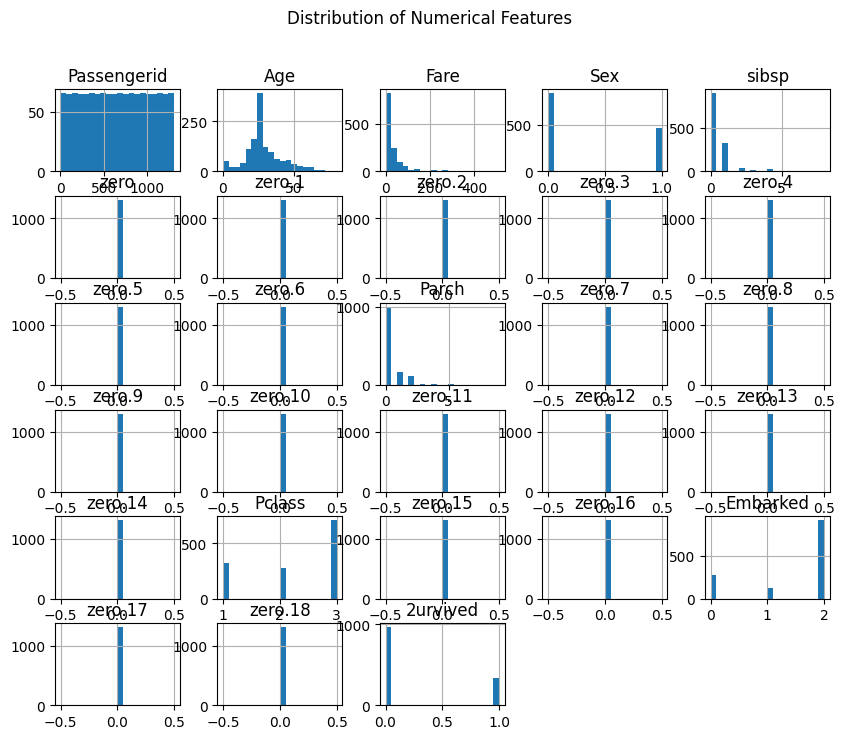

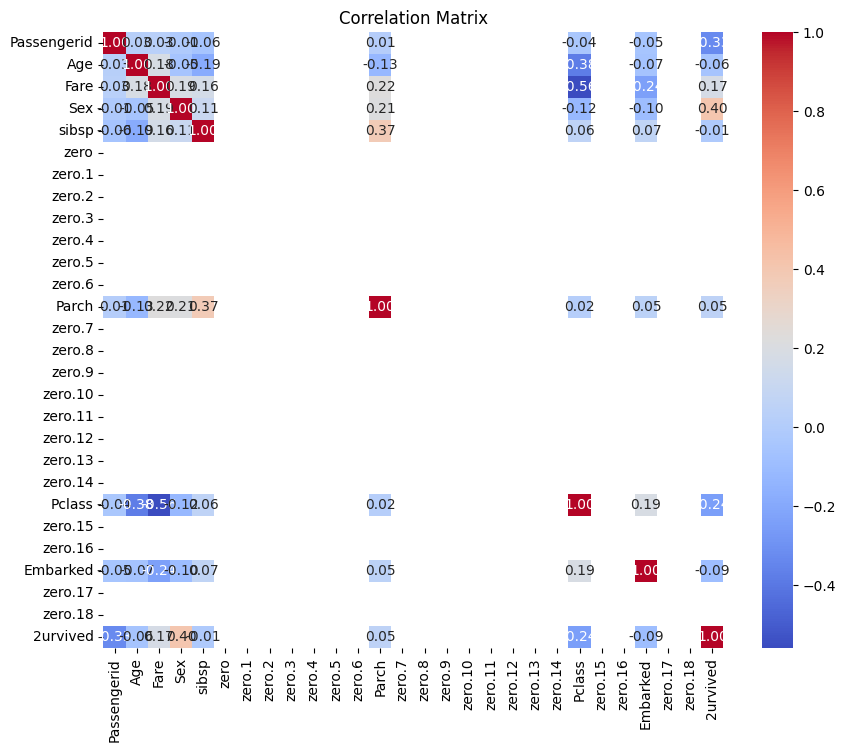

In [30]:
print(f"Dataset shape: {df.shape}")

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe())

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [31]:
df = df.drop(columns=[col for col in df.columns if 'zero' in col or col == 'Passengerid'], errors='ignore')

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()


<ipython-input-31-4a0a9cff366a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-31-4a0a9cff366a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,-0.581628,-0.503291,0,1,0,3,2,0
1,0.658652,0.734744,1,1,0,1,0,1
2,-0.271558,-0.490240,1,0,0,3,2,1
3,0.426099,0.383183,1,1,0,1,2,1
4,0.426099,-0.487824,0,0,0,3,2,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [32]:
df['Family_Size'] = df['sibsp'] + df['Parch']
df['Is_Alone'] = (df['Family_Size'] == 0).astype(int)

df = df.drop(columns=['sibsp', 'Parch'])

for eps in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster_DBSCAN'] = dbscan.fit_predict(df.drop(columns=['Cluster_DBSCAN'], errors='ignore'))

        filtered_df = df[df['Cluster_DBSCAN'] != -1]

        if len(filtered_df) > 0 and len(filtered_df['Cluster_DBSCAN'].unique()) > 1:
            sil_score = silhouette_score(filtered_df.drop(columns=['Cluster_DBSCAN']), filtered_df['Cluster_DBSCAN'])

            if sil_score > best_score:
                best_score = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Silhouette Score: {best_score} with parameters: {best_params}")

Best Silhouette Score: 0.6086466048454989 with parameters: {'eps': 0.3, 'min_samples': 10}


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [33]:
dbscan_optimal = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['Cluster_DBSCAN'] = dbscan_optimal.fit_predict(df.drop(columns=['Cluster_DBSCAN'], errors='ignore'))

filtered_df = df[df['Cluster_DBSCAN'] != -1]
if len(filtered_df) > 0 and len(filtered_df['Cluster_DBSCAN'].unique()) > 1:
    final_sil_score = silhouette_score(filtered_df.drop(columns=['Cluster_DBSCAN']), filtered_df['Cluster_DBSCAN'])
    print(f"Final Silhouette Score for DBSCAN with best parameters: {final_sil_score}")
else:
    print("All points were labeled as noise with the optimal parameters.")


Final Silhouette Score for DBSCAN with best parameters: 0.6086466048454989


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

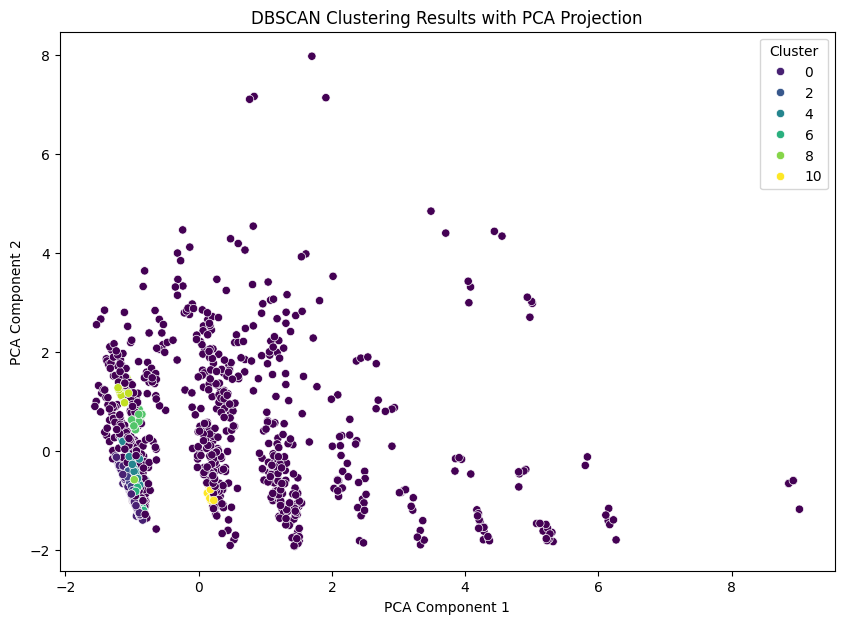

In [34]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster_DBSCAN']))

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster_DBSCAN'], palette='viridis')
plt.title("DBSCAN Clustering Results with PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Cluster -1 (Noise):

Merupakan titik yang dianggap sebagai noise oleh DBSCAN.
Memiliki ukuran terbesar dengan 597 data.
Nilai rata-rata untuk setiap fitur berada di tengah-tengah atau bervariasi, yang menunjukkan bahwa titik-titik ini tidak memiliki kesamaan yang kuat untuk dimasukkan dalam cluster lain.

Cluster 0:

Memiliki jumlah 22 data, dengan rata-rata penumpang berada di kelas ekonomi (Pclass 3) dan tidak sendirian (Family_Size > 0).
Cluster ini mungkin mewakili penumpang yang memiliki nilai keluarga besar tetapi dengan tarif yang lebih rendah.

Cluster 1:

Berisi 12 data yang unik karena semua adalah individu yang sendirian (Is_Alone = 1) dan kelas ekonomi.
Tarifnya cenderung lebih rendah dari rata-rata, menunjukkan mereka berasal dari segmen demografis tertentu.

Cluster 2:

Terdiri dari 252 data dan menampilkan pola yang mirip dengan Cluster 1 (Is_Alone = 1).
Namun, mungkin ada perbedaan kecil dalam tarif dan karakteristik lainnya yang memisahkannya dari Cluster 1.

Cluster 3:

Cluster ini memiliki 41 data dengan karakteristik yang mendekati Cluster 1 dan 2, tetapi mungkin sedikit lebih terisolasi karena nilai lain seperti Pclass dan Embarked.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
df.to_csv('/content/drive/My Drive/titanic_clustering_results.csv', index=False)
print("Clustered data has been saved to 'titanic_clustering_results.csv'")

Clustered data has been saved to 'titanic_clustering_results.csv'
